In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import os

data_dir = "C:\\Users\\Mike\\DeepLearning\\LSTM_Regression_predict_weather\\"
fname = os.path.join(data_dir, 'AUDUSD.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume']
1115242


In [3]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [4]:
float_data

array([[ 0.89725,  0.89736,  0.89723,  0.89726, 86.8    ],
       [ 0.89728,  0.89733,  0.89719,  0.89719, 60.13   ],
       [ 0.89731,  0.89733,  0.89713,  0.89725, 62.69   ],
       ...,
       [ 1.03912,  1.03929,  1.03899,  1.0392 , 29.8267 ],
       [ 1.03936,  1.03943,  1.03912,  1.03912, 83.0965 ],
       [ 1.03925,  1.03926,  1.0391 ,  1.0391 , 18.4913 ]])

In [5]:
from matplotlib import pyplot as plt

open_price = float_data[:, 1]  # Temeperatura (stopnie Celsjusza)
plt.plot(range(len(open_price)), open_price)
plt.show()

<Figure size 640x480 with 1 Axes>

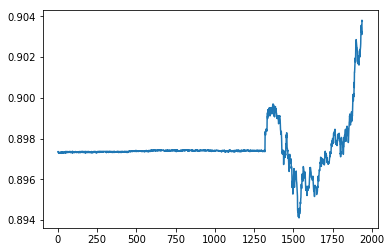

In [6]:
plt.plot(range(1940), open_price[:1940])
plt.show()

In [7]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [8]:
float_data

array([[ 0.20850774,  0.20772032,  0.21195695,  0.2087245 ,  0.62560058],
       [ 0.20946485,  0.20676224,  0.21068224,  0.2064914 ,  0.12942015],
       [ 0.21042195,  0.20676224,  0.20877018,  0.20840549,  0.17704752],
       ...,
       [ 4.73466252,  4.74042811,  4.72950909,  4.73681561, -0.43435578],
       [ 4.74231937,  4.74489918,  4.73365188,  4.73426349,  0.55669903],
       [ 4.73880998,  4.73947002,  4.73301452,  4.73362546, -0.64524456]])

In [9]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [22]:
lookback = 10
step = 1
delay = 3
batch_size = 12

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=12,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# Liczba kroków pobierania danych z obiektu val_gen 
# zapewniających przetworzenie całego walidacyjnego zbioru danych.
val_steps = (300000 - 200001 - lookback) // batch_size

# Liczba kroków pobierania danych z obiektu test_gen, 
# przy której przetworzony zostanie cały testowy zbiór danych.
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
sorted(train_gen)

In [ ]:
print(sorted(train_gen))